Total delivery time (steps): 40


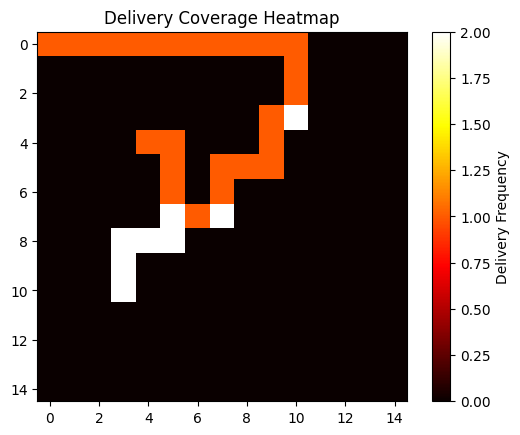

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# A* algorithm helper functions
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(node, grid):
    neighbors = []
    rows, cols = grid.shape
    directions = [(0,1),(1,0),(0,-1),(-1,0)]
    for d in directions:
        nr, nc = node[0] + d[0], node[1] + d[1]
        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] != 1:
            neighbors.append((nr, nc))
    return neighbors

def a_star(grid, start, goal):
    open_set = []
    heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    visited = set()
    while open_set:
        est_total_cost, cost, current, path = heappop(open_set)
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                heappush(open_set, (cost + 1 + heuristic(neighbor, goal), cost + 1, neighbor, path + [neighbor]))
    return None  # no path found

# Greedy assignment of packages to drones to reduce overlap
def assign_packages(drones, packages, grid):
    assignments = {d: [] for d in drones}
    assigned = set()
    
    for pkg in packages:
        best_drone = None
        best_dist = float('inf')
        for d in drones:
            dist = heuristic(d, pkg)
            if dist < best_dist:
                best_dist = dist
                best_drone = d
        assignments[best_drone].append(pkg)
        assigned.add(pkg)
    return assignments

# Calculate total delivery time for paths
def total_delivery_time(paths):
    return sum(len(path) for path in paths)

# Visualize coverage heatmap
def visualize_coverage(grid, paths):
    coverage = np.zeros_like(grid, dtype=int)
    for path in paths:
        for (r,c) in path:
            coverage[r][c] += 1
    
    plt.imshow(coverage, cmap="hot", interpolation='nearest')
    plt.colorbar(label='Delivery Frequency')
    plt.title("Delivery Coverage Heatmap")
    plt.show()

# Main driver
if __name__ == "__main__":
    rows, cols = 15, 15
    grid = np.zeros((rows, cols), dtype=int)  # 0 free, 1 obstacle
    
    # Random obstacles
    np.random.seed(42)
    for _ in range(40):
        r, c = np.random.randint(0, rows), np.random.randint(0, cols)
        grid[r][c] = 1
    
    drones = [(0, 0), (14, 14)]
    packages = [(3, 10), (7, 7), (10, 3), (12, 12), (4, 4)]
    
    assignments = assign_packages(drones, packages, grid)
    
    all_paths = []
    for drone, pkgs in assignments.items():
        current_pos = drone
        for pkg in pkgs:
            path = a_star(grid, current_pos, pkg)
            if path:
                all_paths.append(path)
                current_pos = pkg
    
    print(f"Total delivery time (steps): {total_delivery_time(all_paths)}")
    visualize_coverage(grid, all_paths)

